In [42]:
# Import necessary packages.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
# Load everything.

data   = np.loadtxt('./data/data.txt').astype(int)
movies = pd.read_csv('./data/movies.txt', sep="\t", names=["id", "title", \
                    "unknown", "action", "adventure", "animation", "childrens", \
                    "comedy", "crime", "documentary", "drama", "fantasy", 
                    "film-noir", "horror", "musical", "mystery", "romance", \
                    "sci-fi", "thriller", "war", "western"])
train  = np.loadtxt('./data/train.txt').astype(int)
test   = np.loadtxt('./data/test.txt').astype(int)

In [66]:
movname_list = []
movidx_list = []


for i in range(len(movies)):
    name = movies["title"][i]
    idx = movies["id"][i]
    
    if name not in movname_list:
        movname_list.append(name)
        
    else:
        a = np.where(np.array(movies["title"])==name)[0]+1
        movidx_list.append(np.array(a))



for movidx in movidx_list:
    i, j = movidx
    new_datacol = np.where(data[:, 1] == j, i, data[:, 1])
    new_traincol = np.where(train[:, 1] == j, i, train[:, 1])
    new_testcol = np.where(test[:, 1] == j, i, test[:, 1])
    
data = np.transpose(np.array([data[:, 0], new_datacol, data[:, 2]]))
train = np.transpose(np.array([train[:, 0], new_traincol, train[:, 2]]))
test = np.transpose(np.array([test[:, 0], new_testcol, test[:, 2]]))

# 4.1)

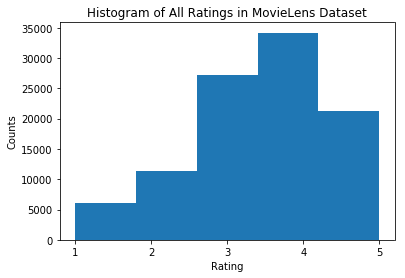

In [67]:
# Make histogram of all ratings in dataset.

ratings = data[:, 2]
plt.hist(ratings, bins=5)
plt.title("Histogram of All Ratings in MovieLens Dataset")
plt.xticks([1, 2, 3, 4, 5])
plt.ylabel("Counts")
plt.xlabel("Rating")
plt.show()

# 4.2)

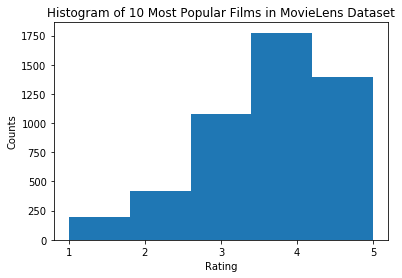

In [68]:
# Find the ten most popular movies.
n_movies = 1682

# Array indicating movie popularity.
mov_pop = np.zeros(n_movies)

for i in range(n_movies):
    movie_index = i + 1
    pop = len(np.where(data[:, 1] == movie_index)[0])
    mov_pop[i] = pop
    
top_movies = np.argsort(mov_pop)[-10:]+1

top_ratings = []

for movie_index in top_movies:
    
    ratings = data[np.where(data[:, 1] == movie_index)[0]][:, 2]
    top_ratings.extend(ratings)

plt.hist(top_ratings, bins=5)
plt.title("Histogram of 10 Most Popular Films in MovieLens Dataset")
plt.ylabel("Counts")
plt.xticks([1, 2, 3, 4, 5])
plt.xlabel("Rating")
plt.show()

# 4.3)

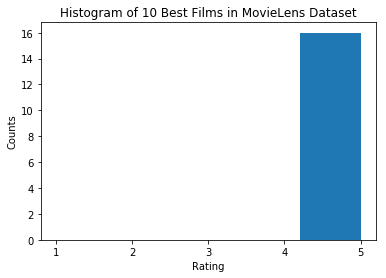

In [71]:
# Find the ten best movies.
n_movies = 1682

# Array indicating movie average ratings
mov_avg = np.zeros(n_movies)

for i in range(n_movies):
    movie_index = i + 1
    if len(data[np.where(data[:, 1] == movie_index)[0]][:, 2]) >= 1:
        avg = np.mean(data[np.where(data[:, 1] == movie_index)[0]][:, 2])
    else:
        avg = 0
    mov_avg[i] = avg

best_movies = np.argsort(mov_avg)[-10:]+1
best_ratings = []

for movie_index in best_movies:
    ratings = data[np.where(data[:, 1] == movie_index)[0]][:, 2]
    best_ratings.extend(ratings)

plt.hist(best_ratings, bins=5, range=[1, 5])
plt.title("Histogram of 10 Best Films in MovieLens Dataset")
plt.ylabel("Counts")
plt.xlabel("Rating")
plt.xticks([1, 2, 3, 4, 5])
plt.show()

# 4.4)

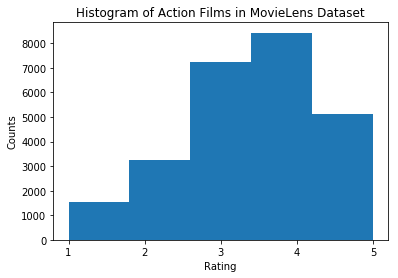

In [57]:
# Find the ratings of action movies.
action = movies[movies['action'] == 1]
action_movies = action['id']

action_ratings = []

for movie_index in action_movies:
    
    ratings = data[np.where(data[:, 1] == movie_index)[0]][:, 2]
    action_ratings.extend(ratings)

plt.hist(action_ratings, bins=5)
plt.title("Histogram of Action Films in MovieLens Dataset")
plt.ylabel("Counts")
plt.xlabel("Rating")
plt.xticks([1, 2, 3, 4, 5])
plt.show()

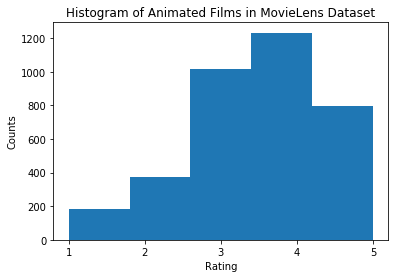

In [58]:
# Find the ratings of animated movies.
animation = movies[movies['animation'] == 1]

ani_movies = animation['id']

ani_ratings = []

for movie_index in ani_movies:
    
    ratings = data[np.where(data[:, 1] == movie_index)[0]][:, 2]
    ani_ratings.extend(ratings)

plt.hist(ani_ratings, bins=5)
plt.title("Histogram of Animated Films in MovieLens Dataset")
plt.ylabel("Counts")
plt.xlabel("Rating")
plt.xticks([1, 2, 3, 4, 5])
plt.show()

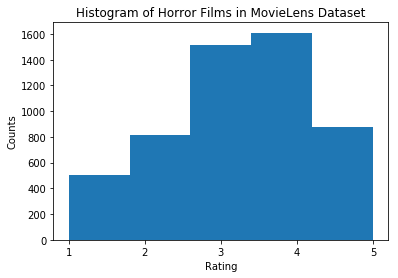

In [59]:
# Find the ratings of horror movies.
horror = movies[movies['horror'] == 1]

hor_movies = horror['id']

hor_ratings = []

for movie_index in hor_movies:
    
    ratings = data[np.where(data[:, 1] == movie_index)[0]][:, 2]
    hor_ratings.extend(ratings)

plt.hist(hor_ratings, bins=5)
plt.title("Histogram of Horror Films in MovieLens Dataset")
plt.ylabel("Counts")
plt.xlabel("Rating")
plt.xticks([1, 2, 3, 4, 5])
plt.show()